25 Million Dataset - Visualization

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
rating_data = pd.read_csv("./data/ratings.csv")
movie_data = pd.read_csv("./data/movies.csv")
tags_data = pd.read_csv("./data/tags.csv")

In [5]:
rating_data.head()

,userId,movieId,rating,timestamp
0,1,296,5.0,1147880044
1,1,306,3.5,1147868817
2,1,307,5.0,1147868828
3,1,665,5.0,1147878820
4,1,899,3.5,1147868510


In [6]:
movie_data.shape

(62423, 3)

In [7]:
rating_data.shape

(25000095, 4)

In [8]:
tags_data.shape

(1093360, 4)

In [9]:
users = rating_data['userId'].values
movies = rating_data['movieId'].values
ratings = rating_data['rating'].values

In [10]:
user_idx = []
user_data = []
user_lst = []
movie_idx = []
movie_lst = []
movie_data = []

In [11]:
user_index_dict = {}
movie_index_dict = {}

for user, movie, rating in zip(users, movies, ratings):
    # For Users
    if user not in user_index_dict:
        n = len(user_lst)
        user_index_dict[user] = n
        user_idx.append(n)
        user_lst.append(user)
        user_data.append([])
    else:
        n = user_index_dict[user]
    # For Movies

    if movie not in movie_index_dict:
        m = len(movie_lst)
        movie_index_dict[movie] = m
        movie_idx.append(m)
        movie_lst.append(movie)
        movie_data.append([])
    else:
        m = movie_index_dict[movie]

    user_data[n].append((m, rating))
    
    movie_data[m].append((n,rating))

Text(55.847222222222214, 0.5, 'frequency')

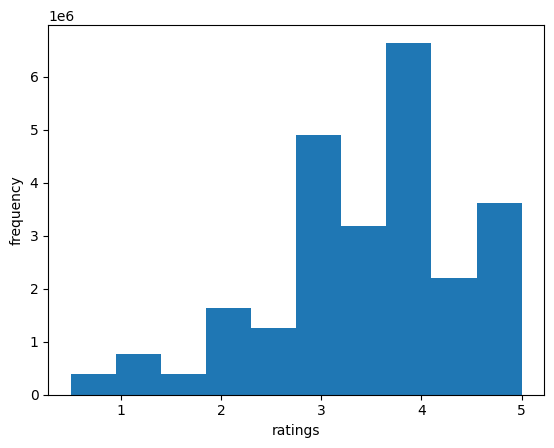

In [ ]:
plt.hist(rating_data['rating'], bins=10)
plt.xlabel('ratings')
plt.savefig('./assets/ratings.pdf')
plt.ylabel('frequency')


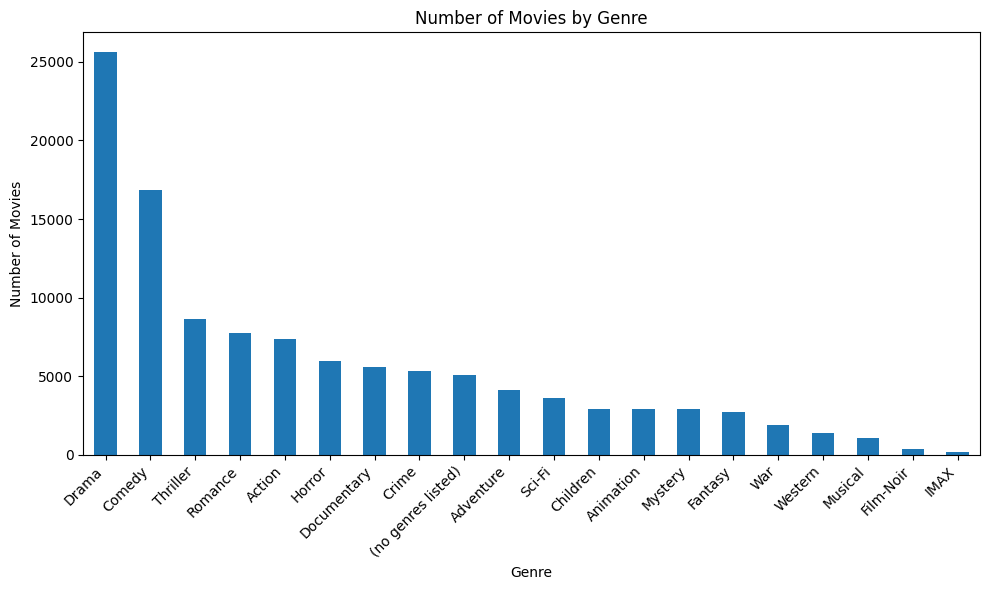

In [ ]:
#list of all genres
all_genres = '|'.join(movie_df['genres']).split('|')
genre_counts = pd.Series(all_genres).value_counts()

plt.figure(figsize=(10,6))
genre_counts.plot(kind='bar')
plt.title('Number of Movies by Genre')
plt.xlabel('Genre')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
filename = './assets/Number_of_movies_by_genre.pdf'
plt.savefig(filename, bbox_inches='tight')

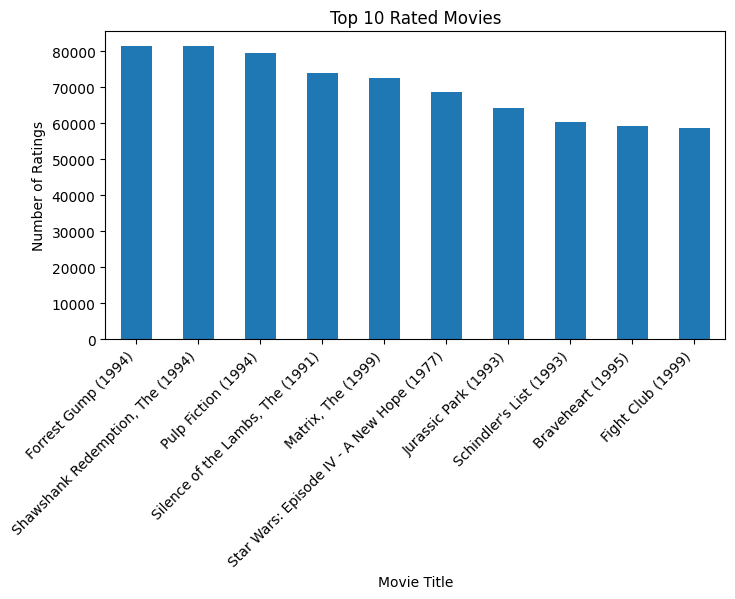

In [ ]:

merged_df = pd.merge(rating_data, movie_df, on='movieId')
movie_ratings_counts = merged_df['title'].value_counts()

#top 10 rated movies
top_10_rated_movies = movie_ratings_counts.head(10)
plt.figure(figsize=(8,4))
top_10_rated_movies.plot(kind='bar')
plt.title('Top 10 Rated Movies')
plt.xlabel('Movie Title')
plt.ylabel('Number of Ratings')
plt.xticks(rotation=45, ha='right')
filename = './assets/Top_10_Rated_movies.pdf'
plt.savefig(filename, bbox_inches='tight')

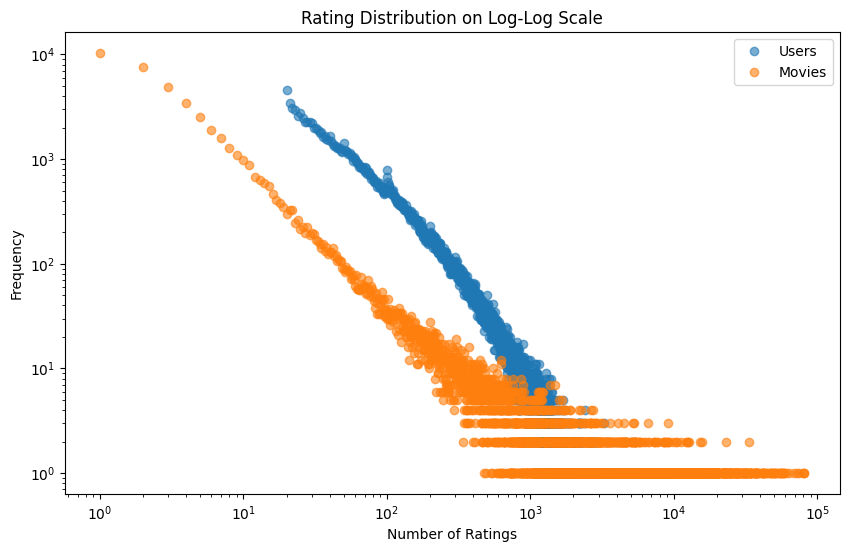

In [ ]:
# Number of ratings per user
ratings_per_user = rating_data.groupby('userId').size()
ratings_per_movie = rating_data.groupby('movieId').size()

plt.figure(figsize=(10, 6))
plt.loglog(ratings_per_user.value_counts().sort_index(), marker='o', linestyle='None', alpha=0.6, label='Users')
plt.loglog(ratings_per_movie.value_counts().sort_index(), marker='o', linestyle='None', alpha=0.6, label='Movies')
plt.xlabel('Number of Ratings')
plt.ylabel('Frequency')
plt.title('Rating Distribution on Log-Log Scale')
plt.legend()
plt.savefig('./assets/powerlaw.pdf')
plt.show()

Train-Test Split

In [191]:
# Initialize for train and test
data_by_user_train = []
data_by_user_test = []
data_by_movie_train = []
data_by_movie_test = []

user_index_dict = {}
movie_index_dict = {}
user_lst = []
movie_lst = []

# Loop through all user, movie, rating data and split into train/test
for user, movie, rating in zip(users, movies, ratings):
   
    if user not in user_index_dict:
        n = len(user_lst)
        user_index_dict[user] = n
        user_lst.append(user)
        data_by_user_train.append([])  
        data_by_user_test.append([])

    else:
        n = user_index_dict[user]

    
    if movie not in movie_index_dict:
        m = len(movie_lst)
        movie_index_dict[movie] = m
        movie_lst.append(movie)
        data_by_movie_train.append([])  
        data_by_movie_test.append([])

    else:
        m = movie_index_dict[movie]

    
    if np.random.rand() < 0.8:
        data_by_user_train[n].append((m, rating))
        data_by_movie_train[m].append((n, rating))
    else:
        data_by_user_test[n].append((m, rating))
        data_by_movie_test[m].append((n, rating))


In [15]:
len(data_by_user_train),len(data_by_movie_train),len(data_by_user_test),len(data_by_movie_test)

(162541, 59047, 162541, 59047)

Bias only model

c:\Users\dzaik\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
100%|██████████| 20/20 [13:05<00:00, 39.29s/it]


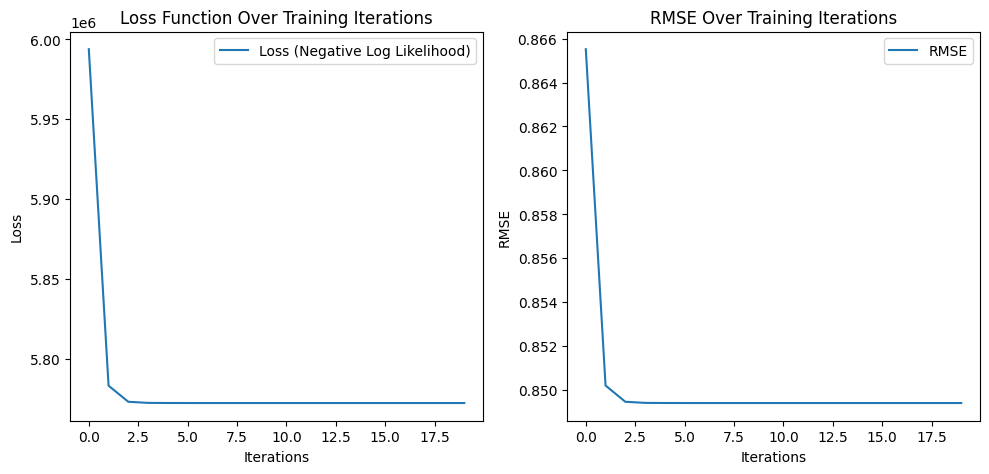

In [ ]:
import numpy as np
from tqdm.auto import tqdm
import matplotlib.pyplot as plt

# Initialize user and item biases
M, N = len(data_by_user_train), len(data_by_movie_train)
user_biases = np.zeros(M)
item_biases = np.zeros(N)

# Set parameters
lambda_ = 0.8
gamma = 0.01
num_iterations = 20
loss_history = []
rmse_history = []

# ALS iterations with tqdm for progress tracking
for iteration in tqdm(range(num_iterations)):
    # Update user biases
    for user_idx in range(M):
        ratings_sum, count = 0, 0
        for movie_idx, rating in data_by_user_train[user_idx]:
            ratings_sum += rating - item_biases[movie_idx]
            count += 1
        if count > 0:
            user_biases[user_idx] = lambda_ * ratings_sum / (lambda_ * count + gamma)

    # Update item biases
    for movie_idx in range(N):
        ratings_sum, count = 0, 0
        for user_idx, rating in data_by_movie_train[movie_idx]:
            ratings_sum += rating - user_biases[user_idx]
            count += 1
        if count > 0:
            item_biases[movie_idx] = lambda_ * ratings_sum / (lambda_ * count + gamma)

    # Compute the loss and RMSE
    squared_error_sum, total_ratings = 0, 0
    for user_idx in range(M):
        for movie_idx, rating in data_by_user_train[user_idx]:
            prediction = user_biases[user_idx] + item_biases[movie_idx]
            squared_error_sum += (rating - prediction) ** 2
            total_ratings += 1

    # Calculate loss and RMSE
    cost = 0.5 * lambda_ * squared_error_sum
    rmse = np.sqrt(squared_error_sum / total_ratings)
    
    loss_history.append(cost)
    rmse_history.append(rmse)

# Plotting loss and RMSE over iterations
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(loss_history, label='Loss (Negative Log Likelihood)')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss Function Over Training Iterations')

plt.subplot(1, 2, 2)
plt.plot(rmse_history, label='RMSE')
plt.xlabel('Iterations')
plt.ylabel('RMSE')
plt.legend()
plt.title('RMSE Over Training Iterations')
plt.tight_layout()
plt.savefig('./assets/loss_and_rmse_bias.pdf')
plt.show()


Biases with latent vectors for training data only

loss 6267127.01  rmse 0.7915330311990493
loss 5266006.32  rmse 0.7255527890164303
loss 4849672.16  rmse 0.6962748874792777
loss 4632082.01  rmse 0.6804721290230188
loss 4495609.73  rmse 0.6703705748482939
loss 4405668.22  rmse 0.6636291295548352
loss 4345612.81  rmse 0.6590893678910774
loss 4303748.01  rmse 0.6559061020944409
loss 4273290.62  rmse 0.6535804771810662
loss 4250499.12  rmse 0.651834767486091
loss 4233102.2  rmse 0.6504991024401037
loss 4219587.32  rmse 0.6494595890553678
loss 4208902.41  rmse 0.6486365673782023
loss 4200311.8  rmse 0.6479741046748807
loss 4193304.53  rmse 0.6474332384141774
loss 4187522.53  rmse 0.6469866067764728
loss 4182708.34  rmse 0.646614499170034
loss 4178670.43  rmse 0.6463022273471284
loss 4175261.78  rmse 0.6460385027959932
loss 4172367.24  rmse 0.6458144696578985


Text(0.5, 1.0, 'RMSE Over Training Iterations')

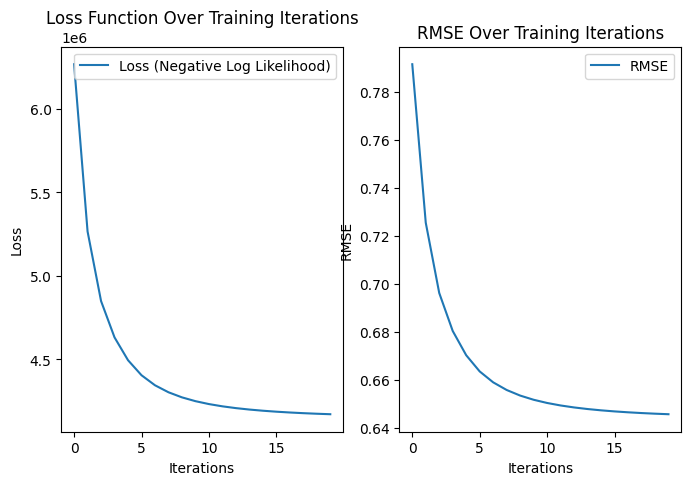

In [ ]:

# Initialize user and item biases to zero
user_biases = np.zeros(len(user_lst))
item_biases = np.zeros(len(movie_lst))
k = 20
M = len(data_by_user_train)
N = len(data_by_movie_train)
user_vectors = np.random.normal(loc=0, scale= 1/np.sqrt(k), size=(M, k))
movie_vectors = np.random.normal(loc=0, scale= 1/np.sqrt(k), size=(N,k))

# Set regularization parameter

lambda_ = 1
num_iterations = 20
gamma = 0.001
tau = 1
loss_history = []
rmse_history = []


# ALS iterations
for iteration in range(num_iterations):
    # Update user biases
    for user_idx in range(len(data_by_user_train)):
        bias = 0
        item_count = 0
        for (movie_idx, rating) in data_by_user_train[user_idx]:
            bias += lambda_ * (rating - item_biases[movie_idx])
            item_count += 1
        user_biases[user_idx] = bias / (lambda_ * item_count + gamma)

    for user_idx in range(len(data_by_user_train)):
      sum_vv = np.zeros((k,k))  
      sum_rv = np.zeros(k)
      for (movie_idx,rating) in data_by_user_train[user_idx]:
          v_n = movie_vectors[movie_idx]
          sum_vv += np.outer(v_n, v_n)  
          sum_rv += (rating - user_biases[user_idx] - item_biases[movie_idx]) * v_n

      user_vectors[user_idx] = np.linalg.solve(
          lambda_ * sum_vv + tau * np.eye(k),
          lambda_ * sum_rv
      )

    # Update item biases
    for movie_idx in range(len(data_by_movie_train)):
        bias = 0  
        item_counter = 0
        for (user_idx, rating) in data_by_movie_train[movie_idx]:
            bias += lambda_ * (rating - user_biases[user_idx])
            item_counter += 1
        item_biases[movie_idx] = bias / (lambda_ * item_counter + gamma)

    for movie_idx in range(N):
        sum_uu = np.zeros((k, k))  
        sum_ru = np.zeros(k)  
        for (user_idx, rating) in data_by_movie_train[movie_idx]:
            u_m = user_vectors[user_idx]
            sum_uu += np.outer(u_m, u_m)
            sum_ru += (rating - user_biases[user_idx] - item_biases[movie_idx]) * u_m
        movie_vectors[movie_idx] = np.linalg.solve(
            lambda_ * sum_uu + tau * np.eye(k),  
            lambda_ * sum_ru
        )

    # Compute the loss for train
    loss = 0
    counter = 0

    for user_idx in range(len(data_by_user_train)):
        for (movie_idx, rating) in data_by_user_train[user_idx]:
            predicted_rating = np.dot(user_vectors[user_idx], movie_vectors[movie_idx]) +user_biases[user_idx] + item_biases[movie_idx]
            loss += (rating - predicted_rating) ** 2  
            counter += 1


    cost = (loss * lambda_) / 2 + (gamma/2)*((np.sum(user_biases**2) + np.sum(item_biases**2)))  
    loss_history.append(cost)
    rmse=np.sqrt((loss) / counter)
    rmse_history.append(rmse)
    print(f"loss {round(cost, 2)}  rmse {rmse}")

    

# Plotting the loss function (Negative Log Likelihood)
plt.figure(figsize=(8, 5))
plt.subplot(1, 2, 1)
plt.plot(loss_history, label='Loss (Negative Log Likelihood)')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss Function Over Training Iterations')
plt.subplot(1, 2, 2)
plt.plot(rmse_history, label='RMSE')
plt.xlabel('Iterations')
plt.ylabel('RMSE')
plt.legend()
plt.savefig('./assets/trainingdata.pdf')
plt.title('RMSE Over Training Iterations')

In [ ]:
import pickle

# dictionary to store all the history
results = {
    "loss_history": loss_history,
    "rmse_history": rmse_history,
    "user_biases": user_biases,
    "item_biases": item_biases,
    "user_vectors": user_vectors,
    "movie_vectors": movie_vectors
}

# Save the results to a file
with open('./model/training_results_k20_als.pkl', 'wb') as f:
    pickle.dump(results, f)

print("Training results for ALS with k=20 have been saved.")


Training results for ALS with k=20 have been saved.


In [21]:
data_by_user_train = [np.array(user_data) for user_data in data_by_user_train]
data_by_movie_train = [np.array(movie_data) for movie_data in data_by_movie_train]
data_by_user_test = [np.array(user_data) for user_data in data_by_user_test]
data_by_movie_test = [np.array(movie_data) for movie_data in data_by_user_test]


Go big or go home

Trying k = 20 as first experiment

Iteration 1/100, Train Loss: 6498520.57, Test Loss: 2409197.0, Train RMSE: 0.7898207512309638, Test RMSE: 0.9274869647423604


Iteration 2/100, Train Loss: 5470328.11, Test Loss: 2177110.57, Train RMSE: 0.7225980347961287, Test RMSE: 0.8785838561087621


Iteration 3/100, Train Loss: 5003098.62, Test Loss: 2049775.17, Train RMSE: 0.6901123504288332, Test RMSE: 0.8510298988738669


Iteration 4/100, Train Loss: 4778675.72, Test Loss: 1985661.33, Train RMSE: 0.6742342880021681, Test RMSE: 0.8376765741875672


Iteration 5/100, Train Loss: 4648357.56, Test Loss: 1946960.68, Train RMSE: 0.6650302310220746, Test RMSE: 0.8300787016400759


Iteration 6/100, Train Loss: 4562783.82, Test Loss: 1920800.66, Train RMSE: 0.6590364001466634, Test RMSE: 0.8252537444197379


Iteration 7/100, Train Loss: 4502399.17, Test Loss: 1902162.45, Train RMSE: 0.654853017060866, Test RMSE: 0.8220409018204673


Iteration 8/100, Train Loss: 4457815.0, Test Loss: 1888527.29, Train RMSE: 0.6518022485588857, Test RMSE: 0.8198671149383283


Iteration 9/100, Train Loss: 4423791.04, Test Loss: 1878401.58, Train RMSE: 0.6495039747635163, Test RMSE: 0.8183983239751748


Iteration 10/100, Train Loss: 4397124.12, Test Loss: 1870790.19, Train RMSE: 0.6477262326854337, Test RMSE: 0.8174176561294286


Iteration 11/100, Train Loss: 4375762.25, Test Loss: 1864991.64, Train RMSE: 0.6463212926942967, Test RMSE: 0.8167762011017209


Iteration 12/100, Train Loss: 4358343.6, Test Loss: 1860512.87, Train RMSE: 0.6451915435731757, Test RMSE: 0.8163712207086371


Iteration 13/100, Train Loss: 4343933.61, Test Loss: 1857019.63, Train RMSE: 0.6442701588728684, Test RMSE: 0.8161345230386449


Iteration 14/100, Train Loss: 4331869.41, Test Loss: 1854283.64, Train RMSE: 0.6435098786616521, Test RMSE: 0.8160208316267599


Iteration 15/100, Train Loss: 4321665.14, Test Loss: 1852142.41, Train RMSE: 0.6428761657044338, Test RMSE: 0.8159987803254561


Iteration 16/100, Train Loss: 4312955.91, Test Loss: 1850475.88, Train RMSE: 0.6423431638429487, Test RMSE: 0.8160457696273195


Iteration 17/100, Train Loss: 4305462.61, Test Loss: 1849192.49, Train RMSE: 0.641891196956605, Test RMSE: 0.8161450453677316


Iteration 18/100, Train Loss: 4298967.88, Test Loss: 1848220.8, Train RMSE: 0.641505051495929, Test RMSE: 0.8162839602827893


Iteration 19/100, Train Loss: 4293299.94, Test Loss: 1847503.82, Train RMSE: 0.6411727982295868, Test RMSE: 0.8164527665542279


Iteration 20/100, Train Loss: 4288321.55, Test Loss: 1846995.5, Train RMSE: 0.6408849752387176, Test RMSE: 0.8166437944445583


Iteration 21/100, Train Loss: 4283922.47, Test Loss: 1846657.84, Train RMSE: 0.6406340345446593, Test RMSE: 0.816850855330618


Iteration 22/100, Train Loss: 4280013.88, Test Loss: 1846458.02, Train RMSE: 0.640413968356492, Test RMSE: 0.8170686586232312


Iteration 23/100, Train Loss: 4276523.83, Test Loss: 1846366.76, Train RMSE: 0.6402199856491456, Test RMSE: 0.817292526608943


Iteration 24/100, Train Loss: 4273393.18, Test Loss: 1846359.81, Train RMSE: 0.6400481830613195, Test RMSE: 0.8175186887223652


Iteration 25/100, Train Loss: 4270572.79, Test Loss: 1846418.18, Train RMSE: 0.6398953286625886, Test RMSE: 0.8177443399966712


Iteration 26/100, Train Loss: 4268021.64, Test Loss: 1846526.79, Train RMSE: 0.6397587409614439, Test RMSE: 0.8179673930702037


Iteration 27/100, Train Loss: 4265705.34, Test Loss: 1846673.74, Train RMSE: 0.639636192198524, Test RMSE: 0.8181863413950873


Iteration 28/100, Train Loss: 4263594.95, Test Loss: 1846849.45, Train RMSE: 0.6395258260486667, Test RMSE: 0.8184000961987835


Iteration 29/100, Train Loss: 4261665.93, Test Loss: 1847045.99, Train RMSE: 0.6394260856600928, Test RMSE: 0.8186078343317954


Iteration 30/100, Train Loss: 4259897.31, Test Loss: 1847256.72, Train RMSE: 0.639335652932874, Test RMSE: 0.8188089220712976


Iteration 31/100, Train Loss: 4258271.06, Test Loss: 1847476.09, Train RMSE: 0.639253400737978, Test RMSE: 0.8190028883023078


Iteration 32/100, Train Loss: 4256771.53, Test Loss: 1847699.66, Train RMSE: 0.6391783570870629, Test RMSE: 0.8191894253492246


Iteration 33/100, Train Loss: 4255385.1, Test Loss: 1847924.08, Train RMSE: 0.6391096788842144, Test RMSE: 0.8193684069784006


Iteration 34/100, Train Loss: 4254099.87, Test Loss: 1848147.05, Train RMSE: 0.6390466336691464, Test RMSE: 0.8195398893712119


Iteration 35/100, Train Loss: 4252905.45, Test Loss: 1848367.04, Train RMSE: 0.6389885878334243, Test RMSE: 0.8197040550128755


Iteration 36/100, Train Loss: 4251792.8, Test Loss: 1848582.85, Train RMSE: 0.638934995632621, Test RMSE: 0.8198611254322294


Iteration 37/100, Train Loss: 4250753.96, Test Loss: 1848793.55, Train RMSE: 0.638885383346125, Test RMSE: 0.8200113289367862


Iteration 38/100, Train Loss: 4249781.92, Test Loss: 1848998.51, Train RMSE: 0.63883933394934, Test RMSE: 0.8201549288288498


Iteration 39/100, Train Loss: 4248870.5, Test Loss: 1849197.53, Train RMSE: 0.6387964790838563, Test RMSE: 0.8202922339895522


Iteration 40/100, Train Loss: 4248014.23, Test Loss: 1849390.58, Train RMSE: 0.6387564960451815, Test RMSE: 0.8204235667923659


Iteration 41/100, Train Loss: 4247208.31, Test Loss: 1849577.66, Train RMSE: 0.638719104567912, Test RMSE: 0.8205492274900652


Iteration 42/100, Train Loss: 4246448.46, Test Loss: 1849758.75, Train RMSE: 0.6386840606134004, Test RMSE: 0.8206694945779183


Iteration 43/100, Train Loss: 4245730.87, Test Loss: 1849933.91, Train RMSE: 0.6386511489232475, Test RMSE: 0.8207846421845368


Iteration 44/100, Train Loss: 4245052.11, Test Loss: 1850103.23, Train RMSE: 0.6386201777121269, Test RMSE: 0.8208949342154838


Iteration 45/100, Train Loss: 4244409.07, Test Loss: 1850266.78, Train RMSE: 0.6385909754965253, Test RMSE: 0.8210006069950159


Iteration 46/100, Train Loss: 4243798.98, Test Loss: 1850424.55, Train RMSE: 0.6385633887705473, Test RMSE: 0.8211018625227912


Iteration 47/100, Train Loss: 4243219.32, Test Loss: 1850576.46, Train RMSE: 0.6385372801966452, Test RMSE: 0.821198870410441


Iteration 48/100, Train Loss: 4242667.79, Test Loss: 1850722.39, Train RMSE: 0.6385125270179949, Test RMSE: 0.8212917736802123


Iteration 49/100, Train Loss: 4242142.35, Test Loss: 1850862.2, Train RMSE: 0.6384890190789972, Test RMSE: 0.8213807008908603


Iteration 50/100, Train Loss: 4241641.1, Test Loss: 1850995.83, Train RMSE: 0.6384666566013982, Test RMSE: 0.8214657829612325


Iteration 51/100, Train Loss: 4241162.33, Test Loss: 1851123.3, Train RMSE: 0.6384453486600836, Test RMSE: 0.8215471634325133


Iteration 52/100, Train Loss: 4240704.48, Test Loss: 1851244.74, Train RMSE: 0.6384250124833057, Test RMSE: 0.8216249971774318


Iteration 53/100, Train Loss: 4240266.13, Test Loss: 1851360.33, Train RMSE: 0.6384055729529934, Test RMSE: 0.82169944426599


Iteration 54/100, Train Loss: 4239845.97, Test Loss: 1851470.32, Train RMSE: 0.6383869620298903, Test RMSE: 0.8217706646900457


Iteration 55/100, Train Loss: 4239442.83, Test Loss: 1851574.92, Train RMSE: 0.6383691181895169, Test RMSE: 0.821838814792313


Iteration 56/100, Train Loss: 4239055.61, Test Loss: 1851674.4, Train RMSE: 0.6383519859491839, Test RMSE: 0.8219040452844205


Iteration 57/100, Train Loss: 4238683.34, Test Loss: 1851768.98, Train RMSE: 0.6383355154505802, Test RMSE: 0.8219665010387374


Iteration 58/100, Train Loss: 4238325.12, Test Loss: 1851858.93, Train RMSE: 0.638319662004565, Test RMSE: 0.8220263221933389


Iteration 59/100, Train Loss: 4237980.13, Test Loss: 1851944.49, Train RMSE: 0.6383043855415244, Test RMSE: 0.8220836451251915


Iteration 60/100, Train Loss: 4237647.6, Test Loss: 1852025.89, Train RMSE: 0.6382896499910238, Test RMSE: 0.8221386019254983


Iteration 61/100, Train Loss: 4237326.84, Test Loss: 1852103.39, Train RMSE: 0.638275422683056, Test RMSE: 0.8221913183909847


Iteration 62/100, Train Loss: 4237017.23, Test Loss: 1852177.2, Train RMSE: 0.638261673906252, Test RMSE: 0.8222419116966547


Iteration 63/100, Train Loss: 4236718.15, Test Loss: 1852247.51, Train RMSE: 0.6382483767268685, Test RMSE: 0.8222904885944256


Iteration 64/100, Train Loss: 4236429.08, Test Loss: 1852314.48, Train RMSE: 0.6382355070148611, Test RMSE: 0.8223371441059606


Iteration 65/100, Train Loss: 4236149.52, Test Loss: 1852378.22, Train RMSE: 0.6382230434087751, Test RMSE: 0.8223819609183265


Iteration 66/100, Train Loss: 4235879.01, Test Loss: 1852438.81, Train RMSE: 0.6382109669177513, Test RMSE: 0.8224250110228903


Iteration 67/100, Train Loss: 4235617.12, Test Loss: 1852496.34, Train RMSE: 0.6381992602483949, Test RMSE: 0.8224663607704832


Iteration 68/100, Train Loss: 4235363.48, Test Loss: 1852550.88, Train RMSE: 0.638187907372163, Test RMSE: 0.8225060769572493


Iteration 69/100, Train Loss: 4235117.73, Test Loss: 1852602.56, Train RMSE: 0.6381768936016007, Test RMSE: 0.8225442299940685


Iteration 70/100, Train Loss: 4234879.55, Test Loss: 1852651.52, Train RMSE: 0.6381662059103248, Test RMSE: 0.8225808934638281


Iteration 71/100, Train Loss: 4234648.65, Test Loss: 1852697.94, Train RMSE: 0.6381558331450169, Test RMSE: 0.8226161420352797


Iteration 72/100, Train Loss: 4234424.77, Test Loss: 1852741.97, Train RMSE: 0.6381457659691864, Test RMSE: 0.8226500493436064


Iteration 73/100, Train Loss: 4234207.68, Test Loss: 1852783.76, Train RMSE: 0.6381359965335521, Test RMSE: 0.8226826863994575


Iteration 74/100, Train Loss: 4233997.16, Test Loss: 1852823.46, Train RMSE: 0.6381265179821226, Test RMSE: 0.8227141205802864


Iteration 75/100, Train Loss: 4233793.0, Test Loss: 1852861.22, Train RMSE: 0.6381173239570496, Test RMSE: 0.8227444151112215


Iteration 76/100, Train Loss: 4233595.01, Test Loss: 1852897.16, Train RMSE: 0.6381084082167745, Test RMSE: 0.822773628908014


Iteration 77/100, Train Loss: 4233403.01, Test Loss: 1852931.39, Train RMSE: 0.6380997643861065, Test RMSE: 0.8228018166312314


Iteration 78/100, Train Loss: 4233216.81, Test Loss: 1852964.03, Train RMSE: 0.6380913858008577, Test RMSE: 0.8228290288129126


Iteration 79/100, Train Loss: 4233036.23, Test Loss: 1852995.18, Train RMSE: 0.6380832654085543, Test RMSE: 0.8228553119987775


Iteration 80/100, Train Loss: 4232861.08, Test Loss: 1853024.92, Train RMSE: 0.6380753957085731, Test RMSE: 0.8228807089402604


Iteration 81/100, Train Loss: 4232691.19, Test Loss: 1853053.33, Train RMSE: 0.6380677687334592, Test RMSE: 0.8229052589033511


Iteration 82/100, Train Loss: 4232526.37, Test Loss: 1853080.5, Train RMSE: 0.6380603760789023, Test RMSE: 0.82292899812223


Iteration 83/100, Train Loss: 4232366.44, Test Loss: 1853106.48, Train RMSE: 0.6380532089818273, Test RMSE: 0.822951960352859


Iteration 84/100, Train Loss: 4232211.22, Test Loss: 1853131.34, Train RMSE: 0.6380462584357425, Test RMSE: 0.8229741774211433


Iteration 85/100, Train Loss: 4232060.53, Test Loss: 1853155.14, Train RMSE: 0.6380395153253826, Test RMSE: 0.8229956796492681


Iteration 86/100, Train Loss: 4231914.19, Test Loss: 1853177.95, Train RMSE: 0.638032970563828, Test RMSE: 0.8230164960806337


Iteration 87/100, Train Loss: 4231772.02, Test Loss: 1853199.81, Train RMSE: 0.6380266152186554, Test RMSE: 0.8230366544899732


Iteration 88/100, Train Loss: 4231633.87, Test Loss: 1853220.78, Train RMSE: 0.6380204406187145, Test RMSE: 0.823056181232492


Iteration 89/100, Train Loss: 4231499.58, Test Loss: 1853240.91, Train RMSE: 0.6380144384354455, Test RMSE: 0.8230751010400469


Iteration 90/100, Train Loss: 4231368.98, Test Loss: 1853260.23, Train RMSE: 0.63800860073514, Test RMSE: 0.8230934368956299


Iteration 91/100, Train Loss: 4231241.92, Test Loss: 1853278.79, Train RMSE: 0.6380029200008375, Test RMSE: 0.8231112100979633


Iteration 92/100, Train Loss: 4231118.28, Test Loss: 1853296.61, Train RMSE: 0.637997389126566, Test RMSE: 0.8231284405575158


Iteration 93/100, Train Loss: 4230997.91, Test Loss: 1853313.72, Train RMSE: 0.6379920013923337, Test RMSE: 0.8231451472647521


Iteration 94/100, Train Loss: 4230880.69, Test Loss: 1853330.16, Train RMSE: 0.6379867504321295, Test RMSE: 0.8231613487859791


Iteration 95/100, Train Loss: 4230766.49, Test Loss: 1853345.95, Train RMSE: 0.6379816302077562, Test RMSE: 0.8231770636233705


Iteration 96/100, Train Loss: 4230655.2, Test Loss: 1853361.13, Train RMSE: 0.6379766349978288, Test RMSE: 0.8231923103357768


Iteration 97/100, Train Loss: 4230546.7, Test Loss: 1853375.73, Train RMSE: 0.637971759403765, Test RMSE: 0.8232071074175014


Iteration 98/100, Train Loss: 4230440.9, Test Loss: 1853389.78, Train RMSE: 0.6379669983673277, Test RMSE: 0.8232214730118155


Iteration 99/100, Train Loss: 4230337.69, Test Loss: 1853403.33, Train RMSE: 0.6379623471872612, Test RMSE: 0.8232354245614704



100%|██████████| 100/100 [3:12:26<00:00, 115.46s/it]

Iteration 100/100, Train Loss: 4230236.98, Test Loss: 1853416.39, Train RMSE: 0.6379578015194165, Test RMSE: 0.8232489784812376


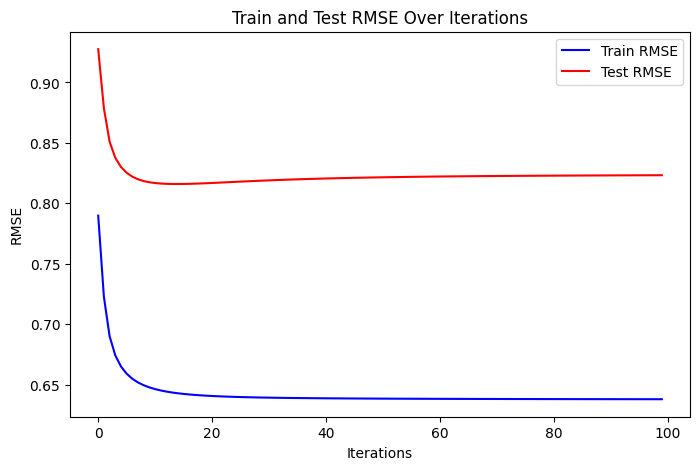

In [ ]:
import numpy as np
from tqdm.auto import tqdm


# Initialize parameters and data structures
M = len(data_by_user_train)
N = len(data_by_movie_train)
k = 20
user_biases = np.zeros(M)
item_biases = np.zeros(N)
user_vectors = np.random.normal(loc=0, scale=1/np.sqrt(k), size=(M, k))
movie_vectors = np.random.normal(loc=0, scale=1/np.sqrt(k), size=(N, k))
train_cost_history = []
test_cost_history = []
rmse_train_history = []
rmse_test_history = []

# Set regularization and learning parameters
lambda_ = 1
gamma = 0.001
tau = 1
num_iterations = 100

# ALS Iterations with progress tracking
for iteration in tqdm(range(num_iterations)):
    # Update user biases and factors
    for user_idx in range(M):
        if len(data_by_user_train[user_idx]) > 0:
            ratings = data_by_user_train[user_idx][:, 1]
            item_indices = data_by_user_train[user_idx][:, 0].astype(int)

            # Compute user bias
            user_biases[user_idx] = lambda_ * np.sum(ratings - np.einsum('i,ji->j', user_vectors[user_idx], movie_vectors[item_indices]) - item_biases[item_indices]) / (lambda_ * len(item_indices) + gamma)

            left = np.sum(np.einsum('ij,il->ijl', movie_vectors[item_indices], movie_vectors[item_indices]), axis=0)
            right = np.sum(np.einsum('ji,j->ji', movie_vectors[item_indices], ratings - user_biases[user_idx] - item_biases[item_indices]), axis=0)
            user_vectors[user_idx] = np.linalg.solve(lambda_ * left + tau * np.eye(k), lambda_ * right)

   
    for movie_idx in range(N):
        if len(data_by_movie_train[movie_idx]) > 0:
            ratings = data_by_movie_train[movie_idx][:, 1]
            user_indices = data_by_movie_train[movie_idx][:, 0].astype(int)

            # Compute item bias
            item_biases[movie_idx] = lambda_ * np.sum(ratings - np.einsum('ij,j->i', user_vectors[user_indices], movie_vectors[movie_idx]) - user_biases[user_indices]) / (lambda_ * len(user_indices) + gamma)

            
            left = np.sum(np.einsum('ij,il->ijl', user_vectors[user_indices], user_vectors[user_indices]), axis=0)
            right = np.sum(np.einsum('ji,j->ji', user_vectors[user_indices], ratings - user_biases[user_indices] - item_biases[movie_idx]), axis=0)
            movie_vectors[movie_idx] = np.linalg.solve(lambda_ * left + tau * np.eye(k), lambda_ * right)

    # Compute the training and testing loss and RMSE
    train_loss, train_error_squared, train_size = 0, 0, 0
    test_loss, test_error_squared, test_size = 0, 0, 0

    # Training error and loss
    for user_idx in range(M):
        if len(data_by_user_train[user_idx]) > 0:
            ratings = data_by_user_train[user_idx][:, 1]
            item_indices = data_by_user_train[user_idx][:, 0].astype(int)
            prediction_error = ratings - np.einsum('i,ji->j', user_vectors[user_idx], movie_vectors[item_indices]) - user_biases[user_idx] - item_biases[item_indices]
            train_error_squared += np.sum(prediction_error ** 2)
            train_size += len(item_indices)

    # Testing error and loss
    for user_idx in range(len(data_by_user_test)):
        if len(data_by_user_test[user_idx]) > 0:
            ratings = data_by_user_test[user_idx][:, 1]
            item_indices = data_by_user_test[user_idx][:, 0].astype(int)
            prediction_error = ratings - np.einsum('i,ji->j', user_vectors[user_idx], movie_vectors[item_indices]) - user_biases[user_idx] - item_biases[item_indices]
            test_error_squared += np.sum(prediction_error ** 2)
            test_size += len(item_indices)

    # Loss and RMSE calculations
    train_cost_k20 = -0.5 * lambda_ * train_error_squared - 0.5 * gamma * (np.sum(user_biases**2) + np.sum(item_biases**2)) - 0.5 * tau * (np.einsum('ij,ij->', movie_vectors, movie_vectors) + np.einsum('ij,ij->', user_vectors, user_vectors))
    test_cost_k20 =  -0.5 * lambda_ * test_error_squared - 0.5 * gamma * (np.sum(user_biases**2) + np.sum(item_biases**2)) - 0.5 * tau * (np.einsum('ij,ij->', movie_vectors, movie_vectors) + np.einsum('ij,ij->', user_vectors, user_vectors))
    rmse_train_k20 = np.sqrt(train_error_squared / train_size)
    rmse_test_k20 = np.sqrt(test_error_squared / test_size)

    # Append costs and errors for plotting
    train_cost_history.append(-train_cost_k20)
    test_cost_history.append(test_cost_k20)
    rmse_train_history.append(rmse_train_k20)
    rmse_test_history.append(rmse_test_k20)

   
    print(f"Iteration {iteration+1}/{num_iterations}, Train Loss: {round(-train_cost_k20, 2)}, Test Loss: {round(-test_cost_k20, 2)}, Train RMSE: {rmse_train_k20}, Test RMSE: {rmse_test_k20}")

# Plotting RMSE for train and test data
plt.figure(figsize=(8, 5))
plt.plot(rmse_train_history, label='Train RMSE', color='blue')
plt.plot(rmse_test_history, label='Test RMSE', color='red')
plt.xlabel('Iterations')
plt.ylabel('RMSE')
plt.legend()
plt.savefig('./assets/train_test_rmsek20_100it_optimized.pdf')
plt.title('Train and Test RMSE Over Iterations')
plt.show()


In [ ]:
import pickle

# dictionary to store all the history
results_k20 = {
    "train_cost_history": train_cost_history,
    "test_cost_history": test_cost_history,
    "rmse_train_history": rmse_train_history,
    "rmse_test_history": rmse_test_history,
    "user_biases": user_biases,
    "item_biases": item_biases,
    "user_vectors": user_vectors,
    "movie_vectors": movie_vectors
}

# Save the results to a file
with open('./model/training_results_k20.pkl', 'wb') as f:
    pickle.dump(results_k20, f)

print("Training results for k=20 have been saved.")


Training results for k=20 have been saved.


Training model for k=10

Iteration 1/100, Train Loss: 6919954.67, Test Loss: 2165490.32, Train RMSE: 0.824640132097916, Test RMSE: 0.9050093072271586


Iteration 2/100, Train Loss: 6079823.14, Test Loss: 1990072.69, Train RMSE: 0.771482668116724, Test RMSE: 0.8634058088199776


Iteration 3/100, Train Loss: 5634744.45, Test Loss: 1873318.62, Train RMSE: 0.7418669440964231, Test RMSE: 0.8351527604763888


Iteration 4/100, Train Loss: 5401968.05, Test Loss: 1808825.56, Train RMSE: 0.7259607830960028, Test RMSE: 0.8193779814102866


Iteration 5/100, Train Loss: 5275385.96, Test Loss: 1772650.78, Train RMSE: 0.717228385764053, Test RMSE: 0.810629758681963


Iteration 6/100, Train Loss: 5199949.78, Test Loss: 1750580.94, Train RMSE: 0.7120200751281272, Test RMSE: 0.8054090991317711


Iteration 7/100, Train Loss: 5151972.56, Test Loss: 1736145.21, Train RMSE: 0.7087245156766522, Test RMSE: 0.8021016974028402


Iteration 8/100, Train Loss: 5119999.28, Test Loss: 1726291.91, Train RMSE: 0.7065494405870759, Test RMSE: 0.7999367156351903


Iteration 9/100, Train Loss: 5097789.87, Test Loss: 1719365.51, Train RMSE: 0.7050585146735318, Test RMSE: 0.7984932497046553


Iteration 10/100, Train Loss: 5081701.47, Test Loss: 1714337.22, Train RMSE: 0.7039954027309473, Test RMSE: 0.7975099679928571


Iteration 11/100, Train Loss: 5069549.19, Test Loss: 1710558.78, Train RMSE: 0.7032060063794919, Test RMSE: 0.796823248959907


Iteration 12/100, Train Loss: 5060019.99, Test Loss: 1707621.31, Train RMSE: 0.7025980089695891, Test RMSE: 0.7963317853938872


Iteration 13/100, Train Loss: 5052313.94, Test Loss: 1705267.37, Train RMSE: 0.7021153631236111, Test RMSE: 0.7959727716295668


Iteration 14/100, Train Loss: 5045930.11, Test Loss: 1703337.16, Train RMSE: 0.7017229005557394, Test RMSE: 0.7957071251034284


Iteration 15/100, Train Loss: 5040547.01, Test Loss: 1701729.56, Train RMSE: 0.7013980118493653, Test RMSE: 0.7955100449324923


Iteration 16/100, Train Loss: 5035950.72, Test Loss: 1700377.27, Train RMSE: 0.701125705528417, Test RMSE: 0.7953652477020501


Iteration 17/100, Train Loss: 5031990.9, Test Loss: 1699233.21, Train RMSE: 0.700895498852153, Test RMSE: 0.7952615515177804


Iteration 18/100, Train Loss: 5028556.34, Test Loss: 1698262.23, Train RMSE: 0.7006997055467672, Test RMSE: 0.7951908524387006


Iteration 19/100, Train Loss: 5025560.26, Test Loss: 1697435.63, Train RMSE: 0.700532371498384, Test RMSE: 0.7951466793942152


Iteration 20/100, Train Loss: 5022932.59, Test Loss: 1696728.79, Train RMSE: 0.700388709733979, Test RMSE: 0.7951235281174028


Iteration 21/100, Train Loss: 5020616.35, Test Loss: 1696121.04, Train RMSE: 0.7002648502324199, Test RMSE: 0.7951168440822021


Iteration 22/100, Train Loss: 5018564.79, Test Loss: 1695595.76, Train RMSE: 0.7001576310161346, Test RMSE: 0.7951230309349547


Iteration 23/100, Train Loss: 5016739.42, Test Loss: 1695139.62, Train RMSE: 0.700064461529523, Test RMSE: 0.7951392605197475


Iteration 24/100, Train Loss: 5015108.48, Test Loss: 1694741.59, Train RMSE: 0.6999832139561932, Test RMSE: 0.7951632336262934


Iteration 25/100, Train Loss: 5013645.62, Test Loss: 1694392.38, Train RMSE: 0.6999121357300457, Test RMSE: 0.7951930550716207


Iteration 26/100, Train Loss: 5012328.89, Test Loss: 1694084.25, Train RMSE: 0.6998497772715534, Test RMSE: 0.7952271821872221


Iteration 27/100, Train Loss: 5011139.79, Test Loss: 1693810.78, Train RMSE: 0.6997949278563095, Test RMSE: 0.7952643801426119


Iteration 28/100, Train Loss: 5010062.6, Test Loss: 1693566.72, Train RMSE: 0.6997465654676825, Test RMSE: 0.7953036786219349


Iteration 29/100, Train Loss: 5009083.84, Test Loss: 1693347.77, Train RMSE: 0.6997038210471405, Test RMSE: 0.795344324249299


Iteration 30/100, Train Loss: 5008191.87, Test Loss: 1693150.41, Train RMSE: 0.699665950781053, Test RMSE: 0.7953857334074228


Iteration 31/100, Train Loss: 5007376.59, Test Loss: 1692971.72, Train RMSE: 0.6996323140039421, Test RMSE: 0.7954274527238459


Iteration 32/100, Train Loss: 5006629.24, Test Loss: 1692809.13, Train RMSE: 0.6996023606625424, Test RMSE: 0.7954691067845566


Iteration 33/100, Train Loss: 5005942.28, Test Loss: 1692660.17, Train RMSE: 0.699575626043268, Test RMSE: 0.7955103299047018


Iteration 34/100, Train Loss: 5005309.11, Test Loss: 1692522.72, Train RMSE: 0.6995517087412243, Test RMSE: 0.7955508374712764


Iteration 35/100, Train Loss: 5004723.84, Test Loss: 1692395.47, Train RMSE: 0.6995302473856331, Test RMSE: 0.7955905058495274


Iteration 36/100, Train Loss: 5004181.27, Test Loss: 1692277.31, Train RMSE: 0.6995109229611337, Test RMSE: 0.795629242640755


Iteration 37/100, Train Loss: 5003676.89, Test Loss: 1692167.12, Train RMSE: 0.6994934673799166, Test RMSE: 0.7956669560221988


Iteration 38/100, Train Loss: 5003206.87, Test Loss: 1692063.88, Train RMSE: 0.6994776632385964, Test RMSE: 0.7957035821767457


Iteration 39/100, Train Loss: 5002767.84, Test Loss: 1691966.54, Train RMSE: 0.6994633243551353, Test RMSE: 0.7957390584606032


Iteration 40/100, Train Loss: 5002356.73, Test Loss: 1691874.14, Train RMSE: 0.6994502809681117, Test RMSE: 0.7957733084979849


Iteration 41/100, Train Loss: 5001970.86, Test Loss: 1691785.82, Train RMSE: 0.6994383813379769, Test RMSE: 0.7958062632827234


Iteration 42/100, Train Loss: 5001607.85, Test Loss: 1691700.88, Train RMSE: 0.6994274932092628, Test RMSE: 0.7958378787361157


Iteration 43/100, Train Loss: 5001265.61, Test Loss: 1691618.8, Train RMSE: 0.6994175009151596, Test RMSE: 0.7958681420107583


Iteration 44/100, Train Loss: 5000942.27, Test Loss: 1691539.22, Train RMSE: 0.6994083019850259, Test RMSE: 0.795897070166768


Iteration 45/100, Train Loss: 5000636.16, Test Loss: 1691461.89, Train RMSE: 0.6993998048987975, Test RMSE: 0.7959247031570648


Iteration 46/100, Train Loss: 5000345.77, Test Loss: 1691386.68, Train RMSE: 0.6993919277230537, Test RMSE: 0.7959510944258308


Iteration 47/100, Train Loss: 5000069.75, Test Loss: 1691313.49, Train RMSE: 0.699384597335525, Test RMSE: 0.7959763024437584


Iteration 48/100, Train Loss: 4999806.92, Test Loss: 1691242.25, Train RMSE: 0.6993777496963761, Test RMSE: 0.7960003845450375


Iteration 49/100, Train Loss: 4999556.21, Test Loss: 1691172.86, Train RMSE: 0.6993713315572385, Test RMSE: 0.7960233924812007


Iteration 50/100, Train Loss: 4999316.75, Test Loss: 1691105.19, Train RMSE: 0.6993653010881646, Test RMSE: 0.7960453683941769


Iteration 51/100, Train Loss: 4999087.72, Test Loss: 1691039.03, Train RMSE: 0.6993596234694448, Test RMSE: 0.7960663439592827


Iteration 52/100, Train Loss: 4998868.36, Test Loss: 1690974.22, Train RMSE: 0.6993542652921839, Test RMSE: 0.7960863478011659


Iteration 53/100, Train Loss: 4998657.97, Test Loss: 1690910.62, Train RMSE: 0.6993491941786117, Test RMSE: 0.7961054129546904


Iteration 54/100, Train Loss: 4998455.91, Test Loss: 1690848.15, Train RMSE: 0.6993443810348193, Test RMSE: 0.7961235757459924


Iteration 55/100, Train Loss: 4998261.61, Test Loss: 1690786.73, Train RMSE: 0.6993398009620322, Test RMSE: 0.7961408713099375


Iteration 56/100, Train Loss: 4998074.56, Test Loss: 1690726.28, Train RMSE: 0.6993354327500966, Test RMSE: 0.7961573310962902


Iteration 57/100, Train Loss: 4997894.31, Test Loss: 1690666.7, Train RMSE: 0.6993312579425013, Test RMSE: 0.7961729833705917


Iteration 58/100, Train Loss: 4997720.42, Test Loss: 1690607.92, Train RMSE: 0.6993272600368942, Test RMSE: 0.7961878560530726


Iteration 59/100, Train Loss: 4997552.53, Test Loss: 1690549.89, Train RMSE: 0.6993234240030285, Test RMSE: 0.7962019799137824


Iteration 60/100, Train Loss: 4997390.26, Test Loss: 1690492.57, Train RMSE: 0.6993197360792466, Test RMSE: 0.7962153899578248


Iteration 61/100, Train Loss: 4997233.29, Test Loss: 1690435.96, Train RMSE: 0.6993161837097743, Test RMSE: 0.7962281245903512


Iteration 62/100, Train Loss: 4997081.33, Test Loss: 1690380.1, Train RMSE: 0.699312755509857, Test RMSE: 0.7962402236887323


Iteration 63/100, Train Loss: 4996934.09, Test Loss: 1690325.0, Train RMSE: 0.699309441214013, Test RMSE: 0.7962517267381255


Iteration 64/100, Train Loss: 4996791.32, Test Loss: 1690270.68, Train RMSE: 0.699306231603542, Test RMSE: 0.7962626715300163


Iteration 65/100, Train Loss: 4996652.8, Test Loss: 1690217.18, Train RMSE: 0.6993031184200033, Test RMSE: 0.7962730934486517


Iteration 66/100, Train Loss: 4996518.3, Test Loss: 1690164.51, Train RMSE: 0.6993000942708073, Test RMSE: 0.7962830252093368


Iteration 67/100, Train Loss: 4996387.64, Test Loss: 1690112.69, Train RMSE: 0.6992971525289002, Test RMSE: 0.79629249691767


Iteration 68/100, Train Loss: 4996260.62, Test Loss: 1690061.72, Train RMSE: 0.6992942872273865, Test RMSE: 0.7963015363598147


Iteration 69/100, Train Loss: 4996137.08, Test Loss: 1690011.62, Train RMSE: 0.6992914929519555, Test RMSE: 0.796310169456031


Iteration 70/100, Train Loss: 4996016.86, Test Loss: 1689962.4, Train RMSE: 0.6992887647387374, Test RMSE: 0.796318420801499


Iteration 71/100, Train Loss: 4995899.81, Test Loss: 1689914.07, Train RMSE: 0.6992860979892846, Test RMSE: 0.7963263142010583


Iteration 72/100, Train Loss: 4995785.8, Test Loss: 1689866.63, Train RMSE: 0.6992834884112467, Test RMSE: 0.7963338731042826


Iteration 73/100, Train Loss: 4995674.68, Test Loss: 1689820.12, Train RMSE: 0.6992809319838742, Test RMSE: 0.796341120884587


Iteration 74/100, Train Loss: 4995566.33, Test Loss: 1689774.54, Train RMSE: 0.6992784249347629, Test RMSE: 0.7963480809768706


Iteration 75/100, Train Loss: 4995460.65, Test Loss: 1689729.94, Train RMSE: 0.6992759637022843, Test RMSE: 0.7963547769668013


Iteration 76/100, Train Loss: 4995357.52, Test Loss: 1689686.33, Train RMSE: 0.6992735448516965, Test RMSE: 0.7963612327605328


Iteration 77/100, Train Loss: 4995256.83, Test Loss: 1689643.76, Train RMSE: 0.6992711649263209, Test RMSE: 0.796367472852037


Iteration 78/100, Train Loss: 4995158.48, Test Loss: 1689602.29, Train RMSE: 0.6992688203043782, Test RMSE: 0.7963735222106427


Iteration 79/100, Train Loss: 4995062.39, Test Loss: 1689561.96, Train RMSE: 0.6992665074324385, Test RMSE: 0.7963794040615547


Iteration 80/100, Train Loss: 4994968.47, Test Loss: 1689522.77, Train RMSE: 0.6992642241275139, Test RMSE: 0.7963851327846875


Iteration 81/100, Train Loss: 4994876.67, Test Loss: 1689484.66, Train RMSE: 0.6992619713368597, Test RMSE: 0.7963907046341419


Iteration 82/100, Train Loss: 4994786.95, Test Loss: 1689447.46, Train RMSE: 0.6992597520680074, Test RMSE: 0.7963961015352208


Iteration 83/100, Train Loss: 4994699.25, Test Loss: 1689411.04, Train RMSE: 0.6992575677149411, Test RMSE: 0.7964013106539062


Iteration 84/100, Train Loss: 4994613.5, Test Loss: 1689375.37, Train RMSE: 0.6992554168787816, Test RMSE: 0.7964063338354196


Iteration 85/100, Train Loss: 4994529.63, Test Loss: 1689340.45, Train RMSE: 0.6992532967867454, Test RMSE: 0.796411181304402


Iteration 86/100, Train Loss: 4994447.58, Test Loss: 1689306.31, Train RMSE: 0.6992512044739708, Test RMSE: 0.7964158653261413


Iteration 87/100, Train Loss: 4994367.28, Test Loss: 1689272.97, Train RMSE: 0.6992491371669389, Test RMSE: 0.796420398114817


Iteration 88/100, Train Loss: 4994288.68, Test Loss: 1689240.45, Train RMSE: 0.699247092337864, Test RMSE: 0.7964247913393111


Iteration 89/100, Train Loss: 4994211.71, Test Loss: 1689208.78, Train RMSE: 0.6992450676959552, Test RMSE: 0.796429055812021


Iteration 90/100, Train Loss: 4994136.33, Test Loss: 1689177.96, Train RMSE: 0.6992430611826597, Test RMSE: 0.796433201187186


Iteration 91/100, Train Loss: 4994062.48, Test Loss: 1689148.0, Train RMSE: 0.6992410709771096, Test RMSE: 0.7964372357643312


Iteration 92/100, Train Loss: 4993990.12, Test Loss: 1689118.92, Train RMSE: 0.6992390955067725, Test RMSE: 0.7964411664741211


Iteration 93/100, Train Loss: 4993919.21, Test Loss: 1689090.7, Train RMSE: 0.6992371334579519, Test RMSE: 0.7964449991002639


Iteration 94/100, Train Loss: 4993849.7, Test Loss: 1689063.35, Train RMSE: 0.69923518378737, Test RMSE: 0.7964487388022654


Iteration 95/100, Train Loss: 4993781.57, Test Loss: 1689036.86, Train RMSE: 0.6992332457535348, Test RMSE: 0.7964523909797728


Iteration 96/100, Train Loss: 4993714.78, Test Loss: 1689011.23, Train RMSE: 0.6992313190157486, Test RMSE: 0.7964559622858065


Iteration 97/100, Train Loss: 4993649.3, Test Loss: 1688986.47, Train RMSE: 0.6992294038432694, Test RMSE: 0.79645946097471


Iteration 98/100, Train Loss: 4993585.11, Test Loss: 1688962.56, Train RMSE: 0.6992275013366556, Test RMSE: 0.796462895246336


Iteration 99/100, Train Loss: 4993522.19, Test Loss: 1688939.47, Train RMSE: 0.6992256133406669, Test RMSE: 0.7964662695694676



100%|██████████| 100/100 [1:28:37<00:00, 53.18s/it]

Iteration 100/100, Train Loss: 4993460.51, Test Loss: 1688917.16, Train RMSE: 0.6992237419113718, Test RMSE: 0.7964695820937201


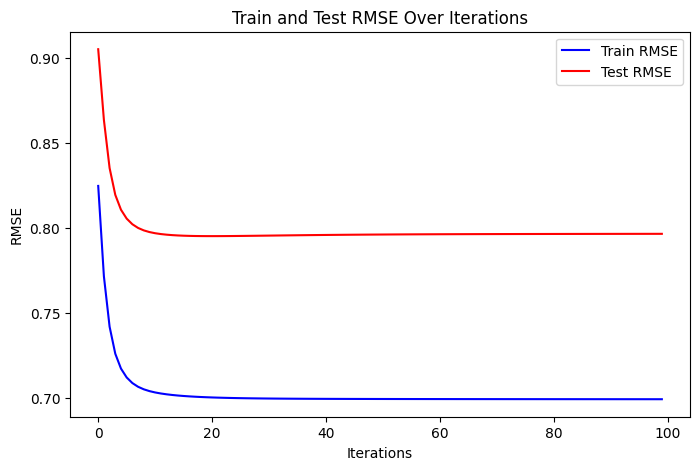

In [ ]:
import numpy as np
from tqdm.auto import tqdm


# Initialize parameters and data structures
M = len(data_by_user_train)
N = len(data_by_movie_train)
k = 10
user_biases = np.zeros(M)
item_biases = np.zeros(N)
user_vectors = np.random.normal(loc=0, scale=1/np.sqrt(k), size=(M, k))
movie_vectors = np.random.normal(loc=0, scale=1/np.sqrt(k), size=(N, k))
train_cost_history_k10 = []
test_cost_history_k10 = []
rmse_train_history_k10 = []
rmse_test_history_k10 = []

# Set regularization and learning parameters
lambda_ = 1
gamma = 0.001
tau = 1
num_iterations = 100

# ALS Iterations with progress tracking
for iteration in tqdm(range(num_iterations)):
    # Update user biases and factors
    for user_idx in range(M):
        if len(data_by_user_train[user_idx]) > 0:
            ratings = data_by_user_train[user_idx][:, 1]
            item_indices = data_by_user_train[user_idx][:, 0].astype(int)

            
            user_biases[user_idx] = lambda_ * np.sum(ratings - np.einsum('i,ji->j', user_vectors[user_idx], movie_vectors[item_indices]) - item_biases[item_indices]) / (lambda_ * len(item_indices) + gamma)

            
            left = np.sum(np.einsum('ij,il->ijl', movie_vectors[item_indices], movie_vectors[item_indices]), axis=0)
            right = np.sum(np.einsum('ji,j->ji', movie_vectors[item_indices], ratings - user_biases[user_idx] - item_biases[item_indices]), axis=0)
            user_vectors[user_idx] = np.linalg.solve(lambda_ * left + tau * np.eye(k), lambda_ * right)

   
    for movie_idx in range(N):
        if len(data_by_movie_train[movie_idx]) > 0:
            ratings = data_by_movie_train[movie_idx][:, 1]
            user_indices = data_by_movie_train[movie_idx][:, 0].astype(int)

            # Compute item bias
            item_biases[movie_idx] = lambda_ * np.sum(ratings - np.einsum('ij,j->i', user_vectors[user_indices], movie_vectors[movie_idx]) - user_biases[user_indices]) / (lambda_ * len(user_indices) + gamma)

            # Update item factors
            left = np.sum(np.einsum('ij,il->ijl', user_vectors[user_indices], user_vectors[user_indices]), axis=0)
            right = np.sum(np.einsum('ji,j->ji', user_vectors[user_indices], ratings - user_biases[user_indices] - item_biases[movie_idx]), axis=0)
            movie_vectors[movie_idx] = np.linalg.solve(lambda_ * left + tau * np.eye(k), lambda_ * right)

    
    train_loss, train_error_squared, train_size = 0, 0, 0
    test_loss, test_error_squared, test_size = 0, 0, 0

    # Training error and loss
    for user_idx in range(M):
        if len(data_by_user_train[user_idx]) > 0:
            ratings = data_by_user_train[user_idx][:, 1]
            item_indices = data_by_user_train[user_idx][:, 0].astype(int)
            prediction_error = ratings - np.einsum('i,ji->j', user_vectors[user_idx], movie_vectors[item_indices]) - user_biases[user_idx] - item_biases[item_indices]
            train_error_squared += np.sum(prediction_error ** 2)
            train_size += len(item_indices)

    # Testing error and loss
    for user_idx in range(M):
        if len(data_by_user_test[user_idx]) > 0:
            ratings = data_by_user_test[user_idx][:, 1]
            item_indices = data_by_user_test[user_idx][:, 0].astype(int)
            prediction_error = ratings - np.einsum('i,ji->j', user_vectors[user_idx], movie_vectors[item_indices]) - user_biases[user_idx] - item_biases[item_indices]
            test_error_squared += np.sum(prediction_error ** 2)
            test_size += len(item_indices)

    # Loss and RMSE calculations
    train_cost_k10 = -0.5 * lambda_ * train_error_squared - 0.5 * gamma * (np.sum(user_biases**2) + np.sum(item_biases**2)) - 0.5 * tau * (np.einsum('ij,ij->', movie_vectors, movie_vectors) + np.einsum('ij,ij->', user_vectors, user_vectors))
    test_cost_k10 =  -0.5 * lambda_ * test_error_squared - 0.5 * gamma * (np.sum(user_biases**2) + np.sum(item_biases**2)) - 0.5 * tau * (np.einsum('ij,ij->', movie_vectors, movie_vectors) + np.einsum('ij,ij->', user_vectors, user_vectors))
    rmse_train_k10 = np.sqrt(train_error_squared / train_size)
    rmse_test_k10 = np.sqrt(test_error_squared / test_size)

   
    train_cost_history_k10.append(-train_cost_k10)
    test_cost_history_k10.append(-test_cost_k10)
    rmse_train_history_k10.append(rmse_train_k10)
    rmse_test_history_k10.append(rmse_test_k10)

   
    print(f"Iteration {iteration+1}/{num_iterations}, Train Loss: {round(-train_cost_k10, 2)}, Test Loss: {round(-test_cost_k10, 2)}, Train RMSE: {rmse_train_k10}, Test RMSE: {rmse_test_k10}")

    # Plotting RMSE for train and test data
plt.figure(figsize=(8, 5))
plt.plot(rmse_train_history_k10, label='Train RMSE', color='blue')
plt.plot(rmse_test_history_k10, label='Test RMSE', color='red')
plt.xlabel('Iterations')
plt.ylabel('RMSE')
plt.legend()
plt.savefig('./assets/train_test_rmsek10_100it_optimized.pdf')
plt.title('Train and Test RMSE Over Iterations')
plt.show()


In [ ]:
import pickle

# dictionary to store all the history
results = {
    "train_cost_history_k10": train_cost_history_k10,
    "test_cost_history_k10": test_cost_history_k10,
    "rmse_train_history_k10": rmse_train_history_k10,
    "rmse_test_history_k10": rmse_test_history_k10,
    "user_biases": user_biases,
    "item_biases": item_biases,
    "user_vectors": user_vectors,
    "movie_vectors": movie_vectors
}

# Save the results to a file
with open('./model/training_results_k10.pkl', 'wb') as f:
    pickle.dump(results, f)

print("Training results have been saved.")


Training results have been saved.


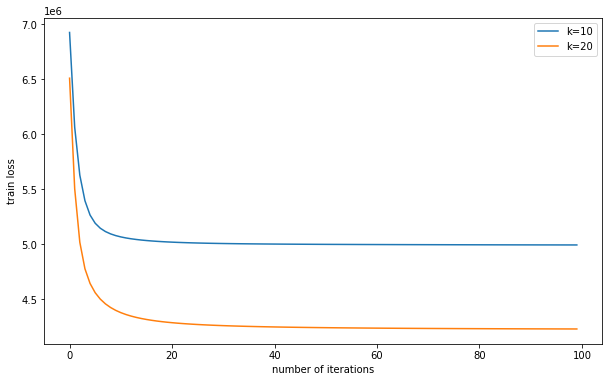

In [ ]:

plt.figure(figsize=(10, 6))
plt.plot(train_cost_history_k10, label='k=10')
plt.plot(train_cost_history, label='k=20')
plt.xlabel('number of iterations')
plt.ylabel('train loss')
plt.legend()


filename = './assets/train_cost_for_various_k.pdf'
plt.savefig(filename, bbox_inches='tight')

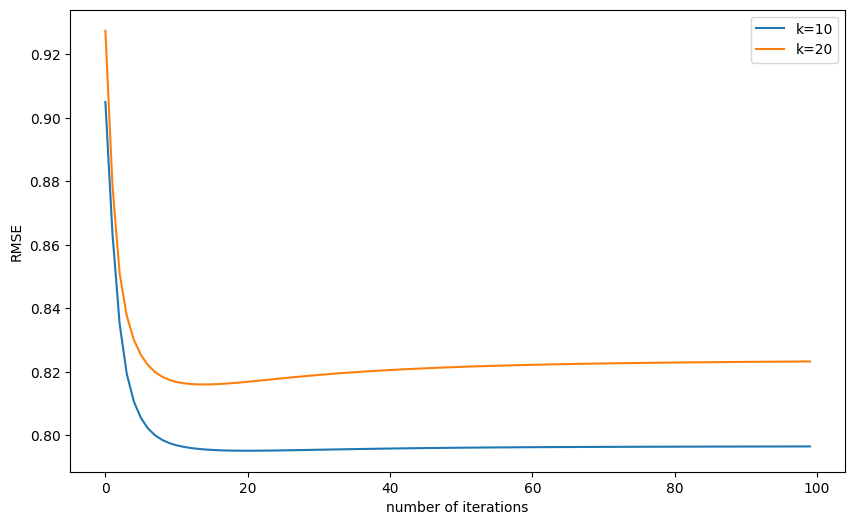

In [ ]:

plt.figure(figsize=(10, 6))
plt.plot(rmse_test_history_k10, label='k=10')
plt.plot(rmse_test_history, label='k=20')
plt.xlabel('number of iterations')
plt.ylabel('RMSE')
plt.legend()


filename = './assets/RMSE_for_various_k_25million.pdf'
plt.savefig(filename, bbox_inches='tight')

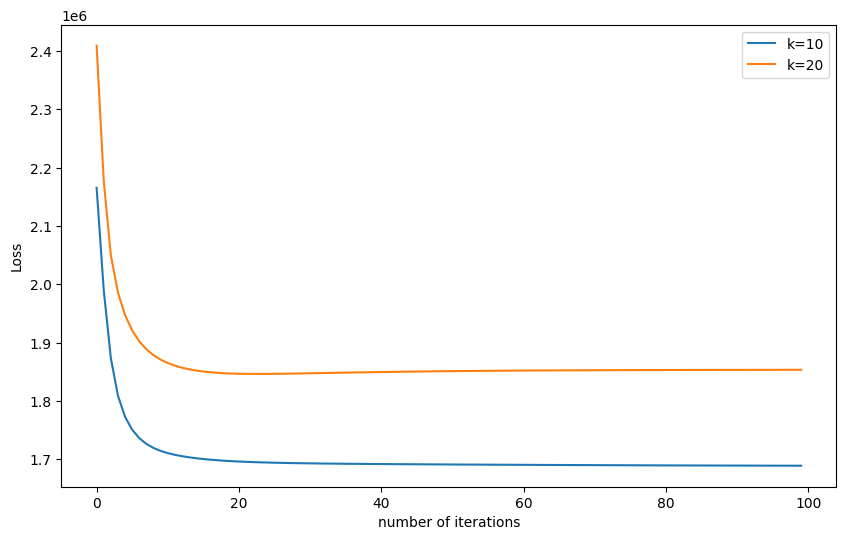

In [ ]:

plt.figure(figsize=(10, 6))
plt.plot([loss for loss in test_cost_history_k10], label='k=10')
plt.plot([-loss for loss in test_cost_history], label='k=20')
plt.xlabel('number of iterations')
plt.ylabel('Loss')
plt.legend()


filename = './assets/losses_for_various_k_25million.pdf'
plt.savefig(filename, bbox_inches='tight')


Creating a dummy user

In [ ]:
movie_df = pd.read_csv("./data/movies.csv")

In [40]:
movie_df

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
62418,209157,We (2018),Drama
62419,209159,Window of the Soul (2001),Documentary
62420,209163,Bad Poems (2018),Comedy|Drama
62421,209169,A Girl Thing (2001),(no genres listed)


In [ ]:
#mapping of movie_idx to movie_id
movie_df['movie_idx'] = movie_df['movieId'].map(movie_index_dict)
movie_df['movie_idx'] = movie_df['movie_idx'].fillna(-1).astype(int)
print(movie_df.head())

   movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  movie_idx  
0  Adventure|Animation|Children|Comedy|Fantasy         70  
1                   Adventure|Children|Fantasy       1103  
2                               Comedy|Romance       1017  
3                         Comedy|Drama|Romance       4270  
4                                       Comedy       1858  


In [ ]:
def search_movies(df, search_phrase):
    search_phrase = search_phrase.lower()
    filtered_df = df[df['title'].str.lower().str.contains(search_phrase)]
    return filtered_df[['title', 'movieId', 'movie_idx']]

search_movies(movie_df, 'Lord of the rings')

,title,movieId,movie_idx
2026,"Lord of the Rings, The (1978)",2116,2189
4887,"Lord of the Rings: The Fellowship of the Ring,...",4993,202
5840,"Lord of the Rings: The Two Towers, The (2002)",5952,36
7028,"Lord of the Rings: The Return of the King, The...",7153,227


In [ ]:
import pickle

# Load the saved results
with open('./models/training_results_k10.pkl', 'rb') as f:
    results = pickle.load(f)
user_vectors = results["user_vectors"]
movie_vectors = results["movie_vectors"]

print("Shape of user_vectors:", user_vectors.shape)
print("Shape of movie_vectors:", movie_vectors.shape)


Shape of user_vectors: (162541, 10)
Shape of movie_vectors: (59047, 10)


In [236]:
import pickle

with open('../AMLAS_dump/models/training_results_k10.pkl', 'rb') as f:
        train_res = pickle.load(f)

In [237]:
user_vectors = train_res["user_vectors"]
movie_vectors = train_res["movie_vectors"]

In [242]:
def new_user_train(dummy_user_list):
    k = 10
    user_vectors = np.zeros(k)
    num_iter = 100
    lambda_ = 0.01
    gamma = 0.001
    tau = 0.01
    
    # Iterate over the number of training iterations
    for i in range(num_iter):
        bias = 0
        item_count = 0
        sum_vv = np.zeros((k, k))
        sum_rv = np.zeros(k)       
        
        # Iterate over the dummy user's movie ratings
        for (movie_idx, rating) in dummy_user_list:
            bias += lambda_ * (rating - item_biases[movie_idx])
            item_count += 1
        user_bias = bias / (lambda_ * item_count + gamma)


        for (movie_idx, rating) in dummy_user_list:
            v_n = movie_vectors[movie_idx]
            sum_vv += np.outer(v_n, v_n)
            sum_rv += (rating - user_bias - item_biases[movie_idx]) * v_n

        # Solve for the new user vector
        user_vectors = np.linalg.solve(
            lambda_ * sum_vv + tau * np.eye(k),
            lambda_ * sum_rv
        )

    return user_vectors

# Train the dummy user on their single rating for movie 2189 (with rating 5)
user_vectors = new_user_train([(2189, 5)])

print(user_vectors)

[-0.03197783 -0.07976336  0.03498552 -0.00220497  0.02189276  0.01373979
  0.02927125 -0.0332123  -0.01048876 -0.03778565]


In [243]:
movie_vectors.shape

(59047, 10)

In [35]:
movie_df.head()

,movieId,title,genres,movie_idx
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,70
1,2,Jumanji (1995),Adventure|Children|Fantasy,1103
2,3,Grumpier Old Men (1995),Comedy|Romance,1017
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,4270
4,5,Father of the Bride Part II (1995),Comedy,1858


In [241]:
item_biases.shape

(59047,)

In [253]:
import numpy as np

def get_top_predictions(user_vectors, movie_vectors, item_biases, movie_data, movie_df, top_n=20, min_users_ratings=300):
   
    movie_scores = np.einsum('i,ji->j', user_vectors, movie_vectors) + 0.01*item_biases

 
    movie_indices = np.argsort(movie_scores)[::-1]
    print(movie_indices)

    
    top_predictions = []
    
   
    for index in movie_indices:
        # Check if the movie has at least min_users_ratings
        if len(movie_data[index]) >= min_users_ratings:
            # Append the movie title to top predictions
            top_predictions.append(movie_df.loc[movie_df['movie_idx'] == index, 'title'].iloc[0])

            if len(top_predictions) >= top_n:
                break

    return top_predictions

In [254]:
print(user_vectors.shape)
print(movie_vectors.shape)


(10,)
(59047, 10)


In [255]:
top_predictions = get_top_predictions(user_vectors, movie_vectors, item_biases, movie_data, movie_df)
top_predictions

[  289  1197  2189 ...  5789 12855  3456]


['Dune (1984)',
 'Star Trek: The Motion Picture (1979)',
 'Lord of the Rings, The (1978)',
 'Star Trek V: The Final Frontier (1989)',
 'Star Wars: Episode II - Attack of the Clones (2002)',
 'Star Wars: Episode I - The Phantom Menace (1999)',
 'Star Wars: Episode VI - Return of the Jedi (1983)',
 'Star Wars: Episode IV - A New Hope (1977)',
 'Star Wars: Episode III - Revenge of the Sith (2005)',
 'Star Wars: Episode V - The Empire Strikes Back (1980)',
 'Star Trek III: The Search for Spock (1984)',
 'Lord of the Rings: The Fellowship of the Ring, The (2001)',
 'Lord of the Rings: The Return of the King, The (2003)',
 'Lord of the Rings: The Two Towers, The (2002)',
 'Star Trek VI: The Undiscovered Country (1991)',
 'Star Trek: Generations (1994)',
 'Star Trek: Insurrection (1998)',
 'Star Trek IV: The Voyage Home (1986)',
 'Star Trek II: The Wrath of Khan (1982)',
 'Dark Crystal, The (1982)']

Polarizing movies

In [ ]:
import numpy as np
from tqdm.auto import tqdm

# Initialize parameters and data structures
M = len(data_by_user_train)
N = len(data_by_movie_train)
k = 2
user_biases = np.zeros(M)
item_biases = np.zeros(N)
user_vectors = np.random.normal(loc=0, scale=1/np.sqrt(k), size=(M, k))
movie_vectors = np.random.normal(loc=0, scale=1/np.sqrt(k), size=(N, k))
train_cost_history_k2 = []
rmse_train_history_k2 = []

# Set regularization and learning parameters
lambda_ = 1
gamma = 0.001
tau = 1
num_iterations = 100


for iteration in tqdm(range(num_iterations)):
    # Update user biases and factors
    for user_idx in range(M):
        if len(data_by_user_train[user_idx]) > 0:
            ratings = data_by_user_train[user_idx][:, 1]
            item_indices = data_by_user_train[user_idx][:, 0].astype(int)

            
            user_biases[user_idx] = lambda_ * np.sum(ratings - np.einsum('i,ji->j', user_vectors[user_idx], movie_vectors[item_indices]) - item_biases[item_indices]) / (lambda_ * len(item_indices) + gamma)

            left = np.sum(np.einsum('ij,il->ijl', movie_vectors[item_indices], movie_vectors[item_indices]), axis=0)
            right = np.sum(np.einsum('ji,j->ji', movie_vectors[item_indices], ratings - user_biases[user_idx] - item_biases[item_indices]), axis=0)
            user_vectors[user_idx] = np.linalg.solve(lambda_ * left + tau * np.eye(k), lambda_ * right)

    # Update item biases and factors
    for movie_idx in range(N):
        if len(data_by_movie_train[movie_idx]) > 0:
            ratings = data_by_movie_train[movie_idx][:, 1]
            user_indices = data_by_movie_train[movie_idx][:, 0].astype(int)

        
            item_biases[movie_idx] = lambda_ * np.sum(ratings - np.einsum('ij,j->i', user_vectors[user_indices], movie_vectors[movie_idx]) - user_biases[user_indices]) / (lambda_ * len(user_indices) + gamma)

            # Update item factors
            left = np.sum(np.einsum('ij,il->ijl', user_vectors[user_indices], user_vectors[user_indices]), axis=0)
            right = np.sum(np.einsum('ji,j->ji', user_vectors[user_indices], ratings - user_biases[user_indices] - item_biases[movie_idx]), axis=0)
            movie_vectors[movie_idx] = np.linalg.solve(lambda_ * left + tau * np.eye(k), lambda_ * right)

    train_error_squared, train_size = 0, 0

    # Training error and loss
    for user_idx in range(M):
        if len(data_by_user_train[user_idx]) > 0:
            ratings = data_by_user_train[user_idx][:, 1]
            item_indices = data_by_user_train[user_idx][:, 0].astype(int)
            prediction_error = ratings - np.einsum('i,ji->j', user_vectors[user_idx], movie_vectors[item_indices]) - user_biases[user_idx] - item_biases[item_indices]
            train_error_squared += np.sum(prediction_error ** 2)
            train_size += len(item_indices)

    # Loss and RMSE
    train_cost_k2 = -0.5 * lambda_ * train_error_squared - 0.5 * gamma * (np.sum(user_biases**2) + np.sum(item_biases**2)) - 0.5 * tau * (np.einsum('ij,ij->', movie_vectors, movie_vectors) + np.einsum('ij,ij->', user_vectors, user_vectors))
    rmse_train_k2 = np.sqrt(train_error_squared / train_size)


    train_cost_history_k2.append(-train_cost_k2)
    rmse_train_history_k2.append(rmse_train_k2)
    print(f"Iteration {iteration+1}/{num_iterations}, Train Loss: {round(-train_cost_k2, 2)}, Train RMSE: {rmse_train_k2}")


Iteration 1/100, Train Loss: 7392966.15, Train RMSE: 0.8588590123386699


Iteration 2/100, Train Loss: 6846327.77, Train RMSE: 0.8258785810522351


Iteration 3/100, Train Loss: 6512331.39, Train RMSE: 0.8050916076668937


Iteration 4/100, Train Loss: 6369916.57, Train RMSE: 0.7960230076926282


Iteration 5/100, Train Loss: 6317498.51, Train RMSE: 0.7926223846259571


Iteration 6/100, Train Loss: 6296720.6, Train RMSE: 0.791246967072762


Iteration 7/100, Train Loss: 6287198.27, Train RMSE: 0.7906033706666609


Iteration 8/100, Train Loss: 6282135.28, Train RMSE: 0.7902548158870865


Iteration 9/100, Train Loss: 6279102.12, Train RMSE: 0.790043295777967


Iteration 10/100, Train Loss: 6277099.21, Train RMSE: 0.7899025142616044


Iteration 11/100, Train Loss: 6275662.65, Train RMSE: 0.7898011324688006


Iteration 12/100, Train Loss: 6274565.31, Train RMSE: 0.7897235394533293


Iteration 13/100, Train Loss: 6273689.3, Train RMSE: 0.7896615107547607


Iteration 14/100, Train Loss: 6272968.99, Train RMSE: 0.7896104170888261


Iteration 15/100, Train Loss: 6272364.7, Train RMSE: 0.7895674338302227


Iteration 16/100, Train Loss: 6271850.88, Train RMSE: 0.789530736115152


Iteration 17/100, Train Loss: 6271410.04, Train RMSE: 0.7894990826997131


Iteration 18/100, Train Loss: 6271029.25, Train RMSE: 0.7894715579167109


Iteration 19/100, Train Loss: 6270698.59, Train RMSE: 0.7894474645882441


Iteration 20/100, Train Loss: 6270410.27, Train RMSE: 0.7894262625377203


Iteration 21/100, Train Loss: 6270157.97, Train RMSE: 0.7894075210754607


Iteration 22/100, Train Loss: 6269936.5, Train RMSE: 0.789390888868136


Iteration 23/100, Train Loss: 6269741.52, Train RMSE: 0.7893760745009669


Iteration 24/100, Train Loss: 6269569.35, Train RMSE: 0.7893628330688203


Iteration 25/100, Train Loss: 6269416.86, Train RMSE: 0.7893509563514874


Iteration 26/100, Train Loss: 6269281.37, Train RMSE: 0.7893402652950668


Iteration 27/100, Train Loss: 6269160.58, Train RMSE: 0.7893306053407129


Iteration 28/100, Train Loss: 6269052.57, Train RMSE: 0.7893218487014421


Iteration 29/100, Train Loss: 6268955.79, Train RMSE: 0.7893138983950384


Iteration 30/100, Train Loss: 6268868.93, Train RMSE: 0.7893066700593415


Iteration 31/100, Train Loss: 6268790.73, Train RMSE: 0.7893000777358935


Iteration 32/100, Train Loss: 6268720.06, Train RMSE: 0.7892940436333373


Iteration 33/100, Train Loss: 6268655.95, Train RMSE: 0.7892885023936344


Iteration 34/100, Train Loss: 6268597.62, Train RMSE: 0.7892833988830151


Iteration 35/100, Train Loss: 6268544.36, Train RMSE: 0.7892786859102452


Iteration 36/100, Train Loss: 6268495.57, Train RMSE: 0.789274322621887


Iteration 37/100, Train Loss: 6268450.74, Train RMSE: 0.789270273293802


Iteration 38/100, Train Loss: 6268409.41, Train RMSE: 0.7892665064505214


Iteration 39/100, Train Loss: 6268371.2, Train RMSE: 0.7892629942681668


Iteration 40/100, Train Loss: 6268335.76, Train RMSE: 0.7892597121464348


Iteration 41/100, Train Loss: 6268302.8, Train RMSE: 0.7892566383483302


Iteration 42/100, Train Loss: 6268272.04, Train RMSE: 0.7892537536661167


Iteration 43/100, Train Loss: 6268243.27, Train RMSE: 0.7892510411112795


Iteration 44/100, Train Loss: 6268216.28, Train RMSE: 0.7892484856340882


Iteration 45/100, Train Loss: 6268190.9, Train RMSE: 0.7892460738759722


Iteration 46/100, Train Loss: 6268166.98, Train RMSE: 0.7892437939538277


Iteration 47/100, Train Loss: 6268144.38, Train RMSE: 0.7892416352731492


Iteration 48/100, Train Loss: 6268122.97, Train RMSE: 0.7892395883666339


Iteration 49/100, Train Loss: 6268102.66, Train RMSE: 0.7892376447546711


Iteration 50/100, Train Loss: 6268083.36, Train RMSE: 0.7892357968246214


Iteration 51/100, Train Loss: 6268064.97, Train RMSE: 0.7892340377264281


Iteration 52/100, Train Loss: 6268047.42, Train RMSE: 0.7892323612818904


Iteration 53/100, Train Loss: 6268030.65, Train RMSE: 0.7892307619059727


Iteration 54/100, Train Loss: 6268014.6, Train RMSE: 0.7892292345383186


Iteration 55/100, Train Loss: 6267999.21, Train RMSE: 0.7892277745834324


Iteration 56/100, Train Loss: 6267984.44, Train RMSE: 0.7892263778584239


Iteration 57/100, Train Loss: 6267970.25, Train RMSE: 0.7892250405472799


Iteration 58/100, Train Loss: 6267956.59, Train RMSE: 0.7892237591606582


Iteration 59/100, Train Loss: 6267943.43, Train RMSE: 0.7892225305005495


Iteration 60/100, Train Loss: 6267930.74, Train RMSE: 0.7892213516291867


Iteration 61/100, Train Loss: 6267918.5, Train RMSE: 0.7892202198416491


Iteration 62/100, Train Loss: 6267906.67, Train RMSE: 0.7892191326417448


Iteration 63/100, Train Loss: 6267895.22, Train RMSE: 0.7892180877207332


Iteration 64/100, Train Loss: 6267884.15, Train RMSE: 0.7892170829385978


Iteration 65/100, Train Loss: 6267873.43, Train RMSE: 0.7892161163075527


Iteration 66/100, Train Loss: 6267863.03, Train RMSE: 0.7892151859774659


Iteration 67/100, Train Loss: 6267852.95, Train RMSE: 0.7892142902229805


Iteration 68/100, Train Loss: 6267843.17, Train RMSE: 0.7892134274321365


Iteration 69/100, Train Loss: 6267833.67, Train RMSE: 0.7892125960963187


Iteration 70/100, Train Loss: 6267824.44, Train RMSE: 0.7892117948011522


Iteration 71/100, Train Loss: 6267815.47, Train RMSE: 0.7892110222186537


Iteration 72/100, Train Loss: 6267806.74, Train RMSE: 0.7892102770999467


Iteration 73/100, Train Loss: 6267798.25, Train RMSE: 0.7892095582689601


Iteration 74/100, Train Loss: 6267789.98, Train RMSE: 0.7892088646166262


Iteration 75/100, Train Loss: 6267781.93, Train RMSE: 0.7892081950957208


Iteration 76/100, Train Loss: 6267774.09, Train RMSE: 0.7892075487162268


Iteration 77/100, Train Loss: 6267766.44, Train RMSE: 0.7892069245410472


Iteration 78/100, Train Loss: 6267758.98, Train RMSE: 0.7892063216823543


Iteration 79/100, Train Loss: 6267751.71, Train RMSE: 0.7892057392979189


Iteration 80/100, Train Loss: 6267744.61, Train RMSE: 0.7892051765881535


Iteration 81/100, Train Loss: 6267737.69, Train RMSE: 0.7892046327931491


Iteration 82/100, Train Loss: 6267730.93, Train RMSE: 0.789204107190077


Iteration 83/100, Train Loss: 6267724.32, Train RMSE: 0.7892035990908512


Iteration 84/100, Train Loss: 6267717.87, Train RMSE: 0.7892031078398763


Iteration 85/100, Train Loss: 6267711.57, Train RMSE: 0.7892026328120489


Iteration 86/100, Train Loss: 6267705.4, Train RMSE: 0.7892021734109849


Iteration 87/100, Train Loss: 6267699.38, Train RMSE: 0.7892017290672343


Iteration 88/100, Train Loss: 6267693.49, Train RMSE: 0.7892012992367364


Iteration 89/100, Train Loss: 6267687.73, Train RMSE: 0.7892008833993917


Iteration 90/100, Train Loss: 6267682.09, Train RMSE: 0.789200481057704


Iteration 91/100, Train Loss: 6267676.58, Train RMSE: 0.7892000917355083


Iteration 92/100, Train Loss: 6267671.19, Train RMSE: 0.7891997149768577


Iteration 93/100, Train Loss: 6267665.9, Train RMSE: 0.7891993503448989


Iteration 94/100, Train Loss: 6267660.73, Train RMSE: 0.7891989974209094


Iteration 95/100, Train Loss: 6267655.67, Train RMSE: 0.7891986558033286


Iteration 96/100, Train Loss: 6267650.71, Train RMSE: 0.7891983251068768


Iteration 97/100, Train Loss: 6267645.86, Train RMSE: 0.7891980049617626


Iteration 98/100, Train Loss: 6267641.1, Train RMSE: 0.7891976950128848


Iteration 99/100, Train Loss: 6267636.44, Train RMSE: 0.7891973949191242




100%|██████████| 100/100 [39:39<00:00, 23.80s/it]

Iteration 100/100, Train Loss: 6267631.88, Train RMSE: 0.7891971043526472


In [132]:
print(movie_df.columns)


Index(['movieId', 'title', 'genres', 'movie_idx'], dtype='object')


In [215]:
unique_genres = set(genre for genres in movie_df['genres'] for genre in genres.split('|'))
print(unique_genres)


{'Film-Noir', '(no genres listed)', 'Adventure', 'Animation', 'Mystery', 'Children', 'Drama', 'IMAX', 'Action', 'Romance', 'Horror', 'Thriller', 'Fantasy', 'Western', 'Comedy', 'Musical', 'Crime', 'War', 'Sci-Fi', 'Documentary'}


In [216]:
popular_movies_index = [index for index, movie in enumerate(movie_data) if isinstance(movie, (str, list)) and len(movie) > 300]
popular_movies_embedding = movie_vectors[popular_movies_index]


In [219]:
most_polarizing_movies = [
    movie_df.loc[movie_df['movie_idx'] == index, 'title'].iloc[0]
    for index in top_10_indices
]
most_polarizing_movies


['Twilight Saga: Breaking Dawn - Part 2, The (2012)',
 'The Human Centipede III (Final Sequence) (2015)',
 'Twilight Saga: Breaking Dawn - Part 1, The (2011)',
 'Last Days (2005)',
 'Fifty Shades Freed (2018)',
 "God's Not Dead (2014)",
 'Julien Donkey-Boy (1999)',
 'Room, The (2003)',
 'Movie 43 (2013)',
 'Freddy Got Fingered (2001)']

In [218]:
least_polarizing_movies = [
    movie_df.loc[movie_df['movie_idx'] == index, 'title'].iloc[0] 
    for index in np.argsort(distances)[:10]
]
least_polarizing_movies


['Jeremiah (1998)',
 'Fabiola (1949)',
 'Carb-Loaded: A Culture Dying to Eat (2014)',
 'Phil (2019)',
 'What Walaa Wants (2018)',
 'A Visitor from the Living (1999)',
 'True Meaning of Christmas Specials, The (2002)',
 'The Orkly Kid (1985)',
 'Right America: Feeling Wronged - Some Voices from the Campaign Trail (2009) ',
 "In the Edges: The 'Grizzly Man' Session (2005) "]

In [209]:
genre_index_dict = {}

for index, row in movie_df.iterrows():
    genres = row['genres'].split('|')
    movie_idx = row['movie_idx']

    for genre in genres:
        if genre in genre_index_dict:
            genre_index_dict[genre].append(movie_idx)
        else:
            genre_index_dict[genre] = [movie_idx]

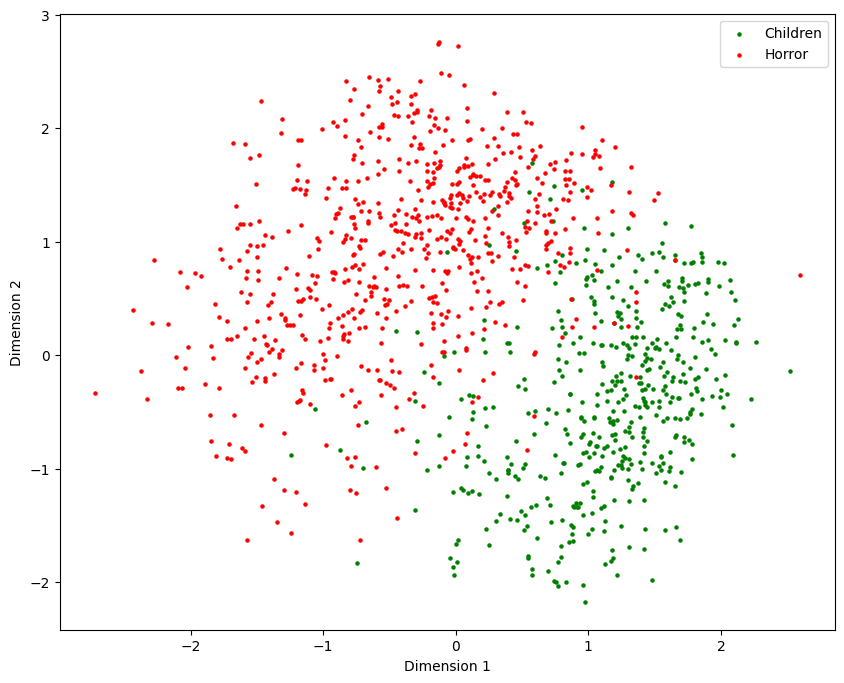

In [ ]:
popular_genre_movie_indexes = {}


for genre in unique_genres:
    popular_genre_movie_indexes[genre] = []

    for index in popular_movies_index:
        if index in genre_index_dict[genre]:
            popular_genre_movie_indexes[genre].append(index)

emb1 = movie_vectors[popular_genre_movie_indexes['Children']]
emb2 = movie_vectors[popular_genre_movie_indexes['Horror']]

plt.figure(figsize=(10,8))
plt.scatter(emb1[:,0], emb1[:,1], s=5, label = 'Children', c = 'green')
plt.scatter(emb2[:,0], emb2[:,1], s=5, label = 'Horror', c = 'red')
plt.legend()
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
filename = './assets/movies_embeddings.pdf'
plt.savefig(filename, bbox_inches='tight')

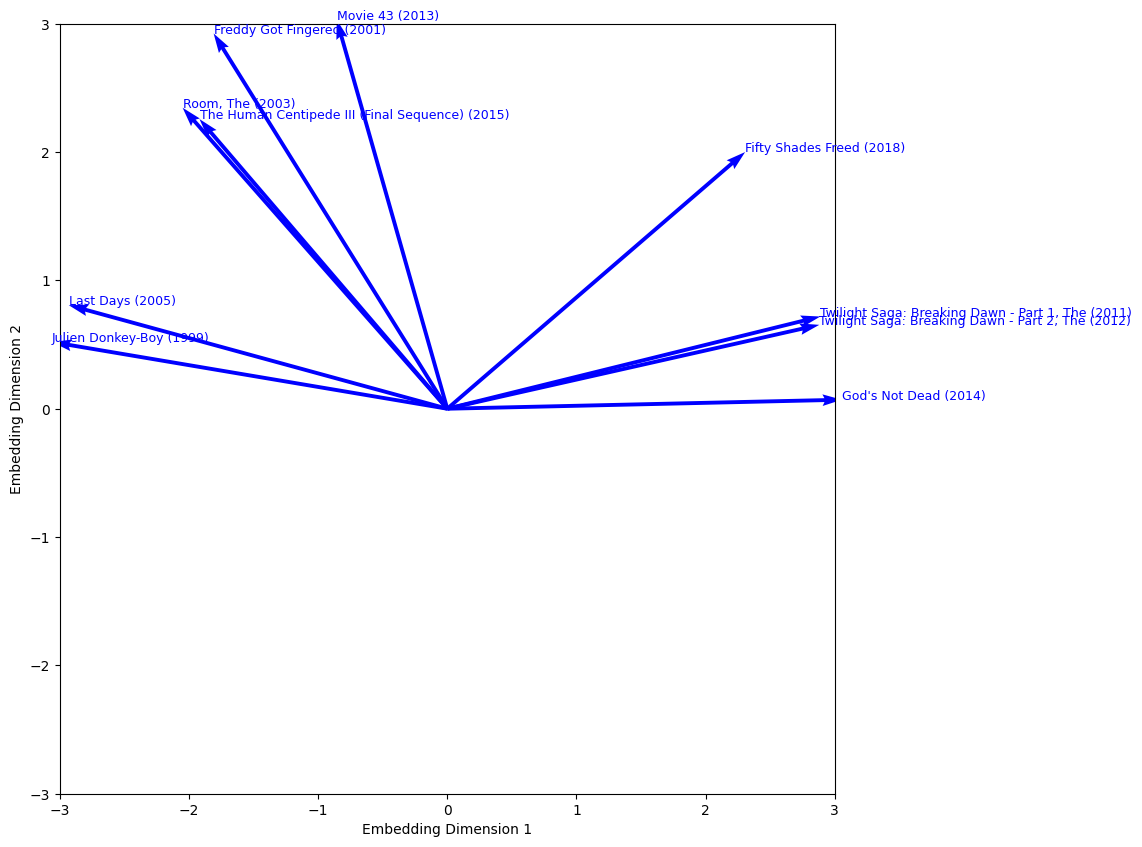

In [221]:
# distances from the origin
distances = np.linalg.norm(movie_vectors, axis=1)

#indices of the top 10 and bottom 10 movies
top_10_indices = np.argsort(distances)[-10:]
plt.figure(figsize=(10, 10))
plt.quiver(np.zeros(len(top_10_indices)), np.zeros(len(top_10_indices)),
           movie_vectors[top_10_indices, 0], movie_vectors[top_10_indices, 1],
           angles='xy', scale_units='xy', scale=1, color='b', width=0.005, label='Most Polarizing')
for i in top_10_indices:
    plt.text(movie_vectors[i, 0], movie_vectors[i, 1], movie_df.loc[movie_df['movie_idx'] == i, 'title'].values[0], fontsize=9, color='blue')

plt.xlim(-3, 3)
plt.ylim(-3, 3)
plt.xlabel('Embedding Dimension 1')
plt.ylabel('Embedding Dimension 2')
filename = './assets/Most_polarizing_movies.pdf'
plt.savefig(filename, bbox_inches='tight')
